In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [5]:
unit = "metric"

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
query_url1 = url + "appid=" + weather_api_key + "&q=" + city
query_url2 = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + city

In [7]:
#for metro in cities:

response = requests.get(query_url2).json()
    
lat = response['coord']['lat']
lon = response['coord']['lon']
mt = response['main']['temp_max']
hum = response['main']['humidity']
cl = response['clouds']['all']
ws = response['wind']['speed'] 
cntry = response['name']
date = response['dt']



In [9]:
lats = []
lons = []
mts = []
hums = []
cls = []
wss = []
cntrys = []
dates = []
cityname = []

for metro in cities:
    query_url2 = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + metro
    
    response = requests.get(query_url2).json()
    
    try:
        response = requests.get(query_url2).json()
        cityname.append(response['name'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        mts.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        cls.append(response['clouds']['all'])
        wss.append(response['wind']['speed'])
        cntrys.append(response['sys']['country'])
        dates.append(response['dt'])
        
        print(response['name'])
    
    except KeyError:
        print("On to the next one")
    
    


Thompson
Sandwick
San Andrés
Chui
Ventspils
Kaitangata
Cape Town
Qaqortoq
Rikitea
New Norfolk
Jamestown
Srīvardhan
Colac
Pevek
On to the next one
Atuona
Camacha
Salalah
Bathsheba
Broome
Ilulissat
Kupang
Qaanaaq
Östersund
Hong Kong
Hamilton
Faya
Punta Arenas
Vao
Marfino
Port Alfred
Klaksvík
Albany
Ushuaia
Ucluelet
Port-Gentil
Lebu
Sistranda
On to the next one
Saint Paul Harbor
Nanortalik
On to the next one
Dikson
Jalu
Aklavik
Puerto Ayora
Jinka
Busselton
Tuktoyaktuk
Oudtshoorn
Lavrentiya
Macedo de Cavaleiros
Sarh
Lincoln
Srednekolymsk
Ukiah
Airai
Anadyr
Kruisfontein
Suntar
Fécamp
Upernavik
Mataura
Tombouctou
Flinders
Cockburn Town
On to the next one
Antsla
Chifeng
Talnakh
Tasiilaq
Athabasca
Safita
Kahului
Port Lincoln
On to the next one
Cabo San Lucas
Troitsko-Pechorsk
Bluff
Tuatapere
George Town
Taltal
On to the next one
Hilo
Hualmay
Sikeston
Mar del Plata
Bambous Virieux
Buala
Kapaa
Mahébourg
Bengkulu
Coquimbo
Eureka
Plouzané
Hermanus
Vostok
Ambon City
Sitka
Vaini
Ust'-Omchug
Nampula


In [10]:
weather_dict = {
    "City": cityname,
    "Latitude": lats, 
    "Longitude": lons,
    "Max Temp": mts,
    "Humidity": hums,
    "Cloudiness": cls,
    "Wind Speed": wss, 
    "Country": cntrys,
    "Date": dates
}


In [11]:
df = pd.DataFrame(weather_dict)

In [12]:
df.head(20)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,18.09,59,100,1.03,CA,1651973892
1,Sandwick,60.0000,-1.2500,5.90,75,97,3.09,GB,1651973893
2,San Andrés,12.5847,-81.7006,28.01,83,20,2.57,CO,1651973894
3,Chui,-33.6971,-53.4616,13.72,84,3,2.08,UY,1651973894
4,Ventspils,57.3894,21.5606,4.96,93,0,3.09,LV,1651973895
5,Kaitangata,-46.2817,169.8464,13.00,96,100,0.77,NZ,1651973896
6,Cape Town,-33.9258,18.4232,14.39,80,0,6.69,ZA,1651973896
7,Qaqortoq,60.7167,-46.0333,4.18,65,100,2.87,GL,1651973897
8,Rikitea,-23.1203,-134.9692,25.30,81,11,7.10,PF,1651973897
9,New Norfolk,-42.7826,147.0587,15.40,58,92,0.89,AU,1651973898


In [13]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.281828,15.641699,16.416777,71.852670,54.292818,3.637182,1.651974e+09
std,33.653055,90.722859,9.750167,20.200938,40.706048,2.486553,1.345687e+02
min,-54.800000,-179.166700,-14.660000,1.000000,0.000000,0.000000,1.651974e+09
25%,-8.264050,-63.297650,9.205000,62.000000,11.000000,1.665000,1.651974e+09
50%,21.402200,20.040300,16.910000,76.000000,57.000000,3.090000,1.651974e+09
75%,47.656750,96.571650,24.585000,87.000000,100.000000,5.050000,1.651974e+09
max,78.218600,179.316700,33.170000,100.000000,100.000000,14.400000,1.651974e+09


In [14]:
df_hum = df.loc[df['Humidity'] > 100]

In [15]:
df_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


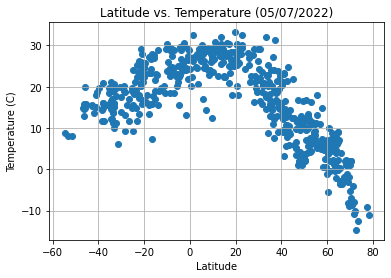

In [16]:
plt.scatter(lats, mts, marker = "o")

plt.grid()

plt.title("Latitude vs. Temperature (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.savefig("../WeatherPy/LatvsTemp.png")
plt.show()

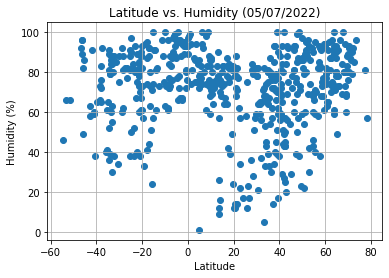

In [17]:
plt.scatter(lats, hums, marker = "o")

plt.grid()

plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../WeatherPy/LatvsHum.png")
plt.show()

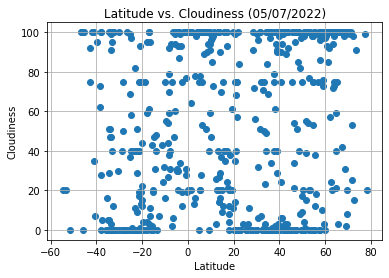

In [18]:
plt.scatter(lats, cls, marker = "o")

plt.grid()

plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../WeatherPy/LatvsCloud.png")
plt.show()

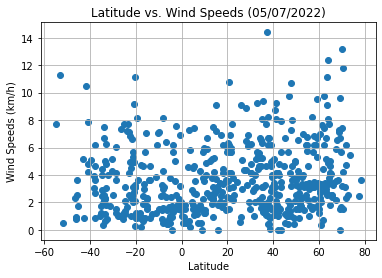

In [19]:
plt.scatter(lats, wss, marker = "o")

plt.grid()

plt.title("Latitude vs. Wind Speeds (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds (km/h)")
plt.savefig("../WeatherPy/LatvsWind.png")
plt.show()

In [20]:
## Linear Regression ##

In [21]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8888804358166119


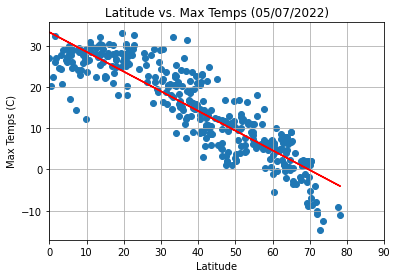

In [22]:
n_lat_range = 90

nlat = df[df['Latitude'] > 0].Latitude

nmts = df[df['Latitude'] > 0]['Max Temp']

n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(nlat, nmts)

n_fit = n_slope * nlat + n_int

plt.xlim(0, n_lat_range)
plt.scatter(nlat, nmts, marker = "o")

plt.plot(nlat, n_fit, "r-")
plt.grid()
plt.title("Latitude vs. Max Temps (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
print(f"The r-value is: {n_r}")
plt.savefig("../WeatherPy/LatvsMaxreg.png")
plt.show()

In [23]:
## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6766295885503624


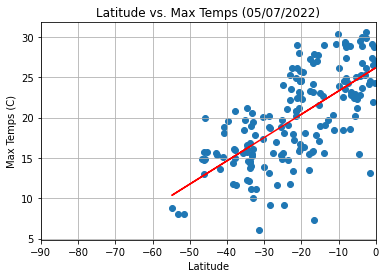

In [24]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

smts = df[df['Latitude'] < 0]['Max Temp']

s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(slat, smts)

s_fit = s_slope * slat + s_int

plt.xlim(s_lat, 0)

plt.scatter(slat, smts, marker = "o")
plt.plot(slat, s_fit, "r-")
plt.grid()
plt.title("Latitude vs. Max Temps (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
print(f"The r-value is: {s_r}")
plt.savefig("../WeatherPy/LatvsSMaxreg.png")
plt.show()

In [25]:
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.6766295885503624


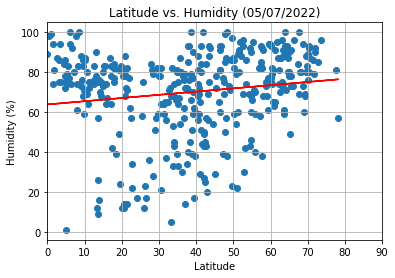

In [26]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

nhum = df[df['Latitude'] > 0]['Humidity']

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(nlat, nhum)

nh_fit = nh_slope * nlat + nh_int

plt.xlim(0, n_lat)

plt.scatter(nlat, nhum, marker = "o")
plt.plot(nlat, nh_fit, "r-")
plt.grid()
plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {s_r}")
plt.savefig("../WeatherPy/LatvsNHum.png")
plt.show()

In [27]:
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28423965533962964


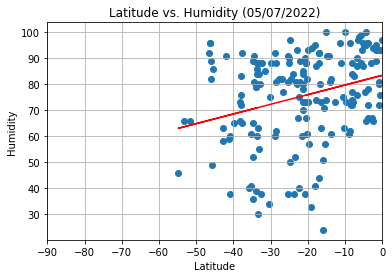

In [28]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

shum = df[df['Latitude'] < 0]['Humidity']

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(slat, shum)

sh_fit = sh_slope * slat + sh_int

plt.xlim(s_lat, 0)

plt.scatter(slat, shum, marker = "o")
plt.plot(slat, sh_fit, "r-")
plt.grid()
plt.title("Latitude vs. Humidity (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {sh_r}")
plt.savefig("../WeatherPy/LatvsSHum.png")
plt.show()

In [29]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15875155959493614


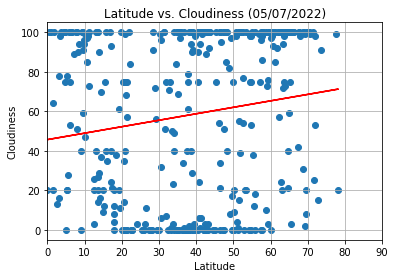

In [30]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

ncls = df[df['Latitude'] > 0]['Cloudiness']

ncls_slope, ncls_int, ncls_r, ncls_p, ncls_std_err = stats.linregress(nlat, ncls)

ncls_fit = ncls_slope * nlat + ncls_int

plt.xlim(0, n_lat)

plt.scatter(nlat, ncls, marker = "o")
plt.plot(nlat, ncls_fit, "r-")
plt.grid()
plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {ncls_r}")
plt.savefig("../WeatherPy/LatvsNCloud.png")
plt.show()

In [31]:
## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09850296105626531


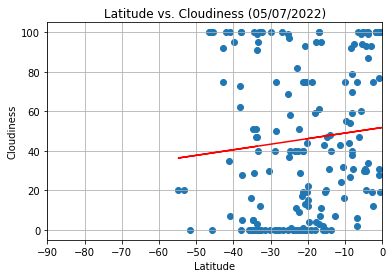

In [32]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

scls = df[df['Latitude'] < 0]['Cloudiness']

scls_slope, scls_int, scls_r, scls_p, scls_std_err = stats.linregress(slat, scls)

scls_fit = scls_slope * slat + scls_int

plt.xlim(s_lat, 0)

plt.scatter(slat, scls, marker = "o")
plt.plot(slat, scls_fit, "r-")
plt.grid()
plt.title("Latitude vs. Cloudiness (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {scls_r}")
plt.savefig("../WeatherPy/LatvsSCloud.png")
plt.show()

In [33]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1579371632265395


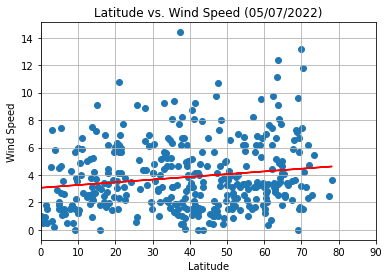

In [34]:
n_lat = 90

nlat = df[df['Latitude'] > 0].Latitude

nwss = df[df['Latitude'] > 0]['Wind Speed']

nwss_slope, nwss_int, nwss_r, nwss_p, nwss_std_err = stats.linregress(nlat, nwss)

nwss_fit = nwss_slope * nlat + nwss_int

plt.xlim(0, n_lat)

plt.scatter(nlat, nwss, marker = "o")
plt.plot(nlat, nwss_fit, "r-")
plt.grid()
plt.title("Latitude vs. Wind Speed (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {nwss_r}")
plt.savefig("../WeatherPy/LatvsNWind.png")
plt.show()

In [35]:
## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14583332507660693


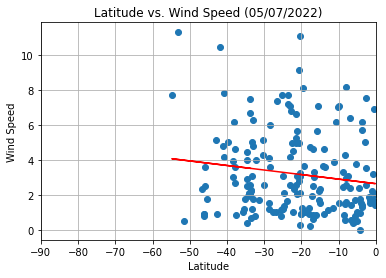

In [36]:
s_lat = -90

slat = df[df['Latitude'] < 0].Latitude

swss = df[df['Latitude'] < 0]['Wind Speed']

swss_slope, swss_int, swss_r, swss_p, swss_std_err = stats.linregress(slat, swss)

swss_fit = swss_slope * slat + swss_int

plt.xlim(s_lat, 0)

plt.scatter(slat, swss, marker = "o")
plt.plot(slat, swss_fit, "r-")
plt.grid()
plt.title("Latitude vs. Wind Speed (05/07/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {swss_r}")
plt.savefig("../WeatherPy/LatvsSWind.png")
plt.show()

In [37]:
df.to_csv('weather_df.csv')